**INSTALL REQUIRED LIBRARY**

In [ ]:
# Install the libraries required for the process
!pip install kaggle
!pip install tensorflow

**IMPORT LIBRARY**

In [ ]:
import os
import zipfile
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras import callbacks
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
from google.colab import files

**1. CREATE FOLDER STRUCTURE**

In [ ]:
# Create base folders to store valid and non-valid datasets
base_dir = '/content/data'
valid_dir = os.path.join(base_dir, 'valid')
non_valid_dir = os.path.join(base_dir, 'non-valid')

In [ ]:
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(non_valid_dir, exist_ok=True)

**2. MENDOWNLOAD DATASET VALID WITH API KAGGLE**

In [ ]:
# Set up Kaggle API authentication and download the valid dataset
!mkdir ~/.kaggle
kaggle_json = '''{"username":"nazulasari","key":"ae8e5d7cb348f04e463621a48f7bbfc6"}'''
with open("/root/.kaggle/kaggle.json", "w") as file:
    file.write(kaggle_json)
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset and extract it to the valid folder
!kaggle datasets download -d mohammadamireshraghi/blood-cell-cancer-all-4class

with zipfile.ZipFile("blood-cell-cancer-all-4class.zip", "r") as zip_ref:
    zip_ref.extractall(valid_dir)

Dataset URL: https://www.kaggle.com/datasets/mohammadamireshraghi/blood-cell-cancer-all-4class
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 1.68G/1.68G [01:26<00:00, 21.0MB/s]
100% 1.68G/1.68G [01:26<00:00, 20.8MB/s]


**3. DOWNLOAD NON-VALID DATASET FROM CIFAR-10**

In [ ]:
# Download the CIFAR-10 dataset and save 1000 images as the non-valid dataset
(_, _), (x_test, _) = cifar10.load_data()
cifar_dir = os.path.join(non_valid_dir, 'cifar')
os.makedirs(cifar_dir, exist_ok=True)

for i in range(1000):  # Use 1000 images from CIFAR-10
    tf.keras.preprocessing.image.save_img(
        os.path.join(cifar_dir, f"img_{i}.png"), x_test[i]
    )

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


**4. PRE-PROCESSING**

In [ ]:
# Preprocess the data using ImageDataGenerator
image_size = (224, 224)
batch_size = 32

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

In [ ]:
# Create generators for training and validation
train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

Found 3394 images belonging to 2 classes.


In [ ]:
val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)

Found 848 images belonging to 2 classes.


**5. PERFORM TRANSFER LEARNING USING RESNET50**

In [ ]:
# Use ResNet50 as the base model for transfer learning
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Add additional layers for classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

**6. TRAIN THE MODEL**

In [ ]:
# Train the model using training and validation datasets
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen,
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 67s 486ms/step - accuracy: 0.7414 - loss: 0.6015 - val_accuracy: 0.7642 - val_loss: 0.5126
Epoch 2/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 64s 393ms/step - accuracy: 0.7671 - loss: 0.5041 - val_accuracy: 0.7642 - val_loss: 0.4604
Epoch 3/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 43s 388ms/step - accuracy: 0.7524 - loss: 0.4581 - val_accuracy: 0.7642 - val_loss: 0.4039
Epoch 4/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 82s 384ms/step - accuracy: 0.7808 - loss: 0.3985 - val_accuracy: 0.7665 - val_loss: 0.3424
Epoch 5/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 81s 379ms/step - accuracy: 0.8213 - loss: 0.3488 - val_accuracy: 0.9858 - val_loss: 0.3024
Epoch 6/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 84s 388ms/step - accuracy: 0.8555 - loss: 0.3090 - val_accuracy: 0.9127 - val_loss: 0.2344
Epoch 7/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.8918 - loss: 0.2607 - val_accuracy: 0.9599 - val_loss: 0.2050
Epoch 8/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 43s 381ms/step - accuracy: 0.9110 - loss: 0.2457 - val

**7. EVALUATE THE MODEL**

In [ ]:
# Display evaluation metrics such as accuracy and loss during training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print(f"Training Accuracy: {acc[-1]:.4f}")
print(f"Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Training Loss: {loss[-1]:.4f}")
print(f"Validation Loss: {val_loss[-1]:.4f}")

Training Accuracy: 0.9750
Validation Accuracy: 0.9788
Training Loss: 0.1231
Validation Loss: 0.0941


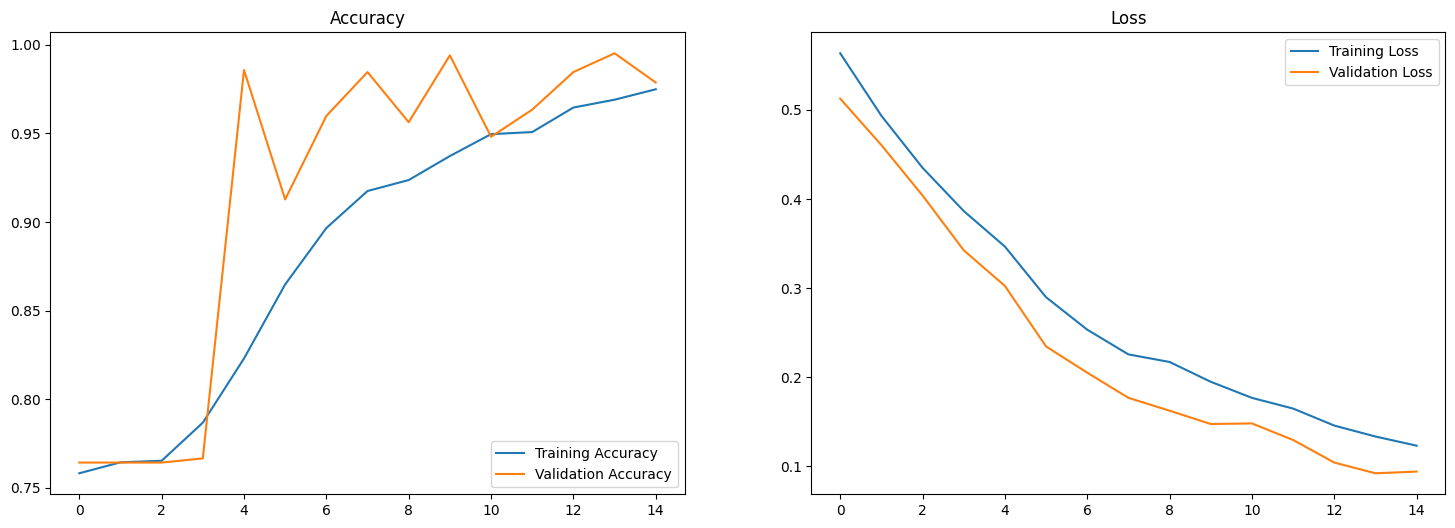

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

Saving Sap_013 (7).jpg to Sap_013 (7).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


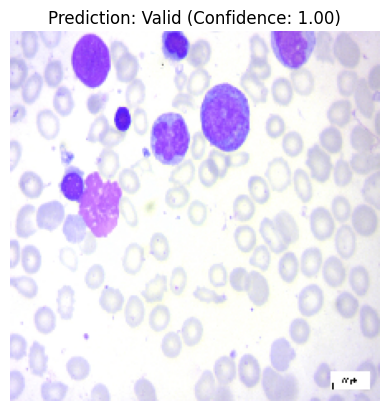

In [ ]:
# Function to predict and display image
def predict_image(image_path, model):
    try:
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Ensure floating-point division

        prediction = model.predict(img_array)

        # Simplified confidence calculation
        confidence = prediction[0][0]
        predicted_class = "Valid" if confidence > 0.5 else "Non-Valid"
        confidence = confidence if predicted_class == "Valid" else 1 - confidence

        plt.imshow(img)
        plt.title(f"Prediction: {predicted_class} (Confidence: {confidence:.2f})")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error processing image: {e}")


# Example usage (after model training)
uploaded = files.upload()
for fn in uploaded.keys():
  predict_image(fn, model)

In [ ]:
# Save the model in HDF5 format
model.save('my_model.h5')

In [ ]:
# Convert the model to TFLite format with quantization optimization
keras_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_quantized = converter.convert()

with open('validation_model.tflite', 'wb') as f:
  f.write(tflite_model_quantized)

Saved artifact at '/tmp/tmpxulzgdke'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_175')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135412971923664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135412943250784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135412943392080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135412943390672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135412943391200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135412943392608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135415495157264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135412943540768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135412943540944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135412943542704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1354129435